
# Machine Learning Final Project
## By: Cierra Church and Surya Malik




# Imports and data preprocessing

* Import Necessary Modules


In [31]:
# imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, classification_report, mean_absolute_error


* Load Dataset with Pandas

In [32]:
# load dataset
data = pd.read_csv('housing.csv')
display(data.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


* Check for missing values

In [33]:
print(data.isnull().sum()) 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


* Distribution of Price across dataset

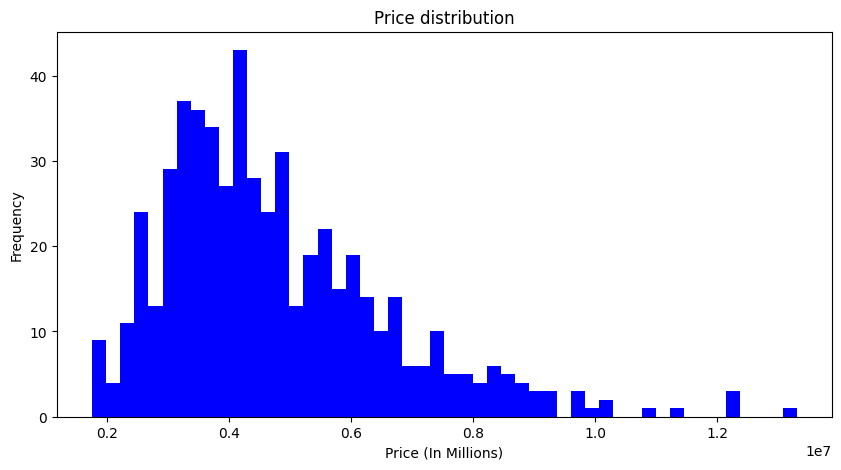

In [34]:
plt.figure(figsize=(10, 5))
plt.hist(data['price'], bins=50, color='blue')
plt.title('Price distribution')
plt.xlabel('Price (In Millions)')
plt.ylabel('Frequency')
plt.show()

What our goal is for this project is to use the various features of each household: 

In [35]:
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


with our machine learning algorithms to accurately predict these housing prices.

** TO DO:
* feature engineering, convert categorical features to numerical 
* standardize numerical features
* ~~select model, baseline linear regression and can expand from there~~
* ~~split data to training data and testing data for evaluations~~
* ~~evaluate model based on metrics like MSE~~
* tune hyperparams 
* recalculate linear regression statistics, go more in depth on interpretation when categorical data transformed
* Based on the values we got, what do we need to do? Regularize, new model, maybe non-linear?
    * How are we adapting our model to improve preformance on the given data
* feature importance???

* Convert categorical data to numerical data.

In [36]:
pd.set_option('future.no_silent_downcasting', True) # to avoid future warning
data['mainroad'] = data['mainroad'].replace(['no', 'yes'], [0, 1]).astype(int)
data['guestroom'] = data['guestroom'].replace(['no', 'yes'], [0, 1]).astype(int)
data['basement'] = data['basement'].replace(['no', 'yes'], [0, 1]).astype(int)
data['hotwaterheating'] = data['hotwaterheating'].replace(['no', 'yes'], [0, 1]).astype(int)
data['airconditioning'] = data['airconditioning'].replace(['no', 'yes'], [0, 1]).astype(int)
data['prefarea'] = data['prefarea'].replace(['no', 'yes'], [0, 1]).astype(int)
data = pd.get_dummies(data, columns=['furnishingstatus'],drop_first=False).astype(int)
data['furnishingstatus_furnished'] = data['furnishingstatus_furnished'].replace([True, False], [1, 0]).astype(int)
data['furnishingstatus_semi-furnished'] = data['furnishingstatus_semi-furnished'].replace([True, False], [1, 0]).astype(int)
data['furnishingstatus_unfurnished'] = data['furnishingstatus_unfurnished'].replace([True, False], [1, 0]).astype(int)
print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                           1                                0   
1                         

In [37]:
display(data.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


# Implementing linear model and getting sample statistics

- Split data into features and target variable

In [38]:
# features and target
X = data.drop('price', axis=1)
# remove categorical data, will remove this when we learn how to handle categorical data
X = X.drop(data.select_dtypes(include='object').columns, axis=1)
# verify categorical data dropped
print(X.columns)
print(X.dtypes)
y = data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # test_size = 0.2 means 20% of the data will be used for testing
# Verifying split
print(X_train.shape, X_test.shape)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_furnished', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                           int64
guestroom                          int64
basement                           int64
hotwaterheating                    int64
airconditioning                    int64
parking                            int64
prefarea                           int64
furnishingstatus_furnished         int64
furnishingstatus_semi-furnished    int64
furnishingstatus_unfurnished       int64
dtype: object
(436, 14) (109, 14)


* Implement linear regression model

[ 2.53092382e+02  1.22097933e+05  9.96973689e+05  4.33489800e+05
  4.41026694e+05  4.02848691e+05  3.24747715e+05  1.21083423e+06
  8.71377886e+05  2.16798687e+05  6.93144410e+05  1.99480684e+05
  9.28208076e+04 -2.92301492e+05]
-149634.06511915475
      Actual     Predicted
542  1750000  2.589945e+06
496  2695000  2.686120e+06
484  2870000  2.002125e+06
507  2590000  2.584883e+06
252  4515000  4.676462e+06
..       ...           ...
70   6790000  6.513074e+06
277  4305000  5.590853e+06
9    9800000  7.732742e+06
359  3710000  2.923780e+06
192  5040000  5.378781e+06

[436 rows x 2 columns]


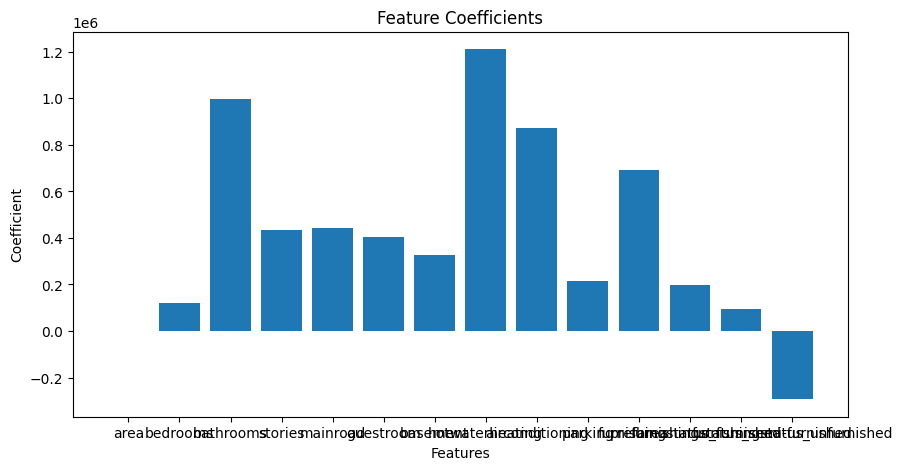

In [39]:
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# These are the coefficients for each feature in the dataset. The intercept is the value of y when all x values are 0. The importance of each feature can be determined by the magnitude of the coefficient. The larger the coefficient, the more important the feature is in predicting the target variable. 
print(model.coef_)
print(model.intercept_)
# Bar chart of coefficients
plt.figure(figsize=(10, 5))
plt.bar(X_train.columns, model.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients')
# Predict the target variable for the training data
y_pred = model.predict(X_train)
# Display predicted price vs actual price
print(pd.DataFrame({'Actual': y_train, 'Predicted': y_pred}))

* Evaluate model


Interpretation of the results:
Mean Absolute Error: 797706.01
This represents the average absolute difference between predicted and actual house prices.
On average, our predictions are off by about 797706.01.

Mean Squared Error: 1157928019785.78
This penalizes larger errors more heavily. It's useful for detecting large prediction errors.

Root Mean Squared Error: 1076070.64
This is in the same unit as the target variable (price).
It suggests that, on average, our predictions deviate by about 1076070.64.

R-squared: 0.6823
This indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
Our model explains approximately 68.23% of the variability in house prices.

The model's performance is moderate. There might be room for improvement.


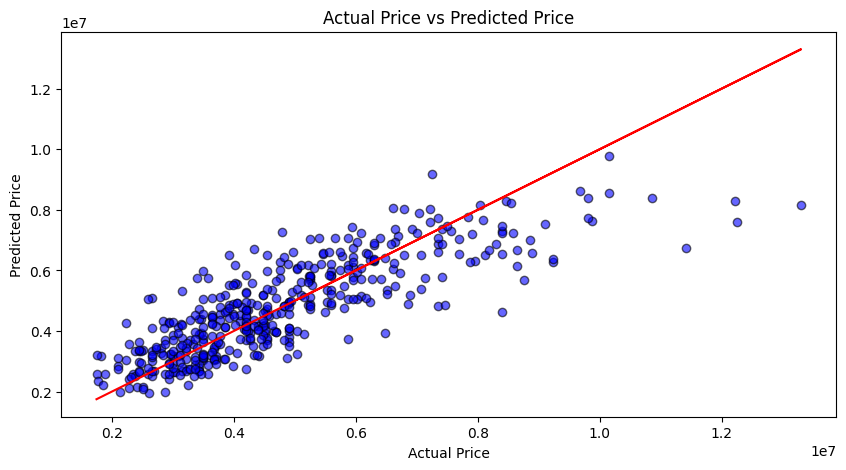

In [40]:

meanAbsoluteError = mean_absolute_error(y_train, y_pred)
meanSquaredError = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
# Interpret the results

print("\nInterpretation of the results:")

# Mean Absolute Error
print(f"Mean Absolute Error: {meanAbsoluteError:.2f}")
print("This represents the average absolute difference between predicted and actual house prices.")
print(f"On average, our predictions are off by about {meanAbsoluteError:.2f}.")

# Mean Squared Error
print(f"\nMean Squared Error: {meanSquaredError:.2f}")
print("This penalizes larger errors more heavily. It's useful for detecting large prediction errors.")

# Root Mean Squared Error
rmse = np.sqrt(meanSquaredError)
print(f"\nRoot Mean Squared Error: {rmse:.2f}")
print("This is in the same unit as the target variable (price).")
print(f"It suggests that, on average, our predictions deviate by about {rmse:.2f}.")

# R-squared
print(f"\nR-squared: {r2:.4f}")
print("This indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).")
print(f"Our model explains approximately {r2*100:.2f}% of the variability in house prices.")

if r2 < 0.5:
    print("\nThe model's performance is poor. Consider feature engineering or trying different algorithms.")
elif 0.5 <= r2 < 0.7:
    print("\nThe model's performance is moderate. There might be room for improvement.")
elif 0.7 <= r2 < 0.9:
    print("\nThe model's performance is good, but could potentially be improved.")
else:
    print("\nThe model's performance is excellent, but be cautious of overfitting.")

# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_pred, color='blue', alpha=0.6, edgecolor='black', label='Actual vs Predicted Price')
# regression line for perfect predictions
plt.plot(y_train, y_train, color='red', label='Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()